# Neural Networks - Lab 1

---


## Ομάδα Α61
### Αβδελάς Λεωνίδας 03113182
### Σκούρας Κωνσταντίνος 03113096


# Dataset Description

This is a data set containing **1079 documents** of free text business descriptions of Brazilian companies **categorized into a subset of 9 categories cataloged** in a table called National Classification of Economic Activities (Classification Nacional de Atividade Economicas - CNAE)

The original texts were pre-processed to obtain the current data set: initially, it was kept only letters and then it was removed prepositions of the texts. Next, the words were transformed to their canonical form. Finally, **each document was represented as a vector, where the weight of each word is its frequency in the document. This data set is highly sparse (99.22% of the matrix is filled with zeros).**

Number of Instances: 1079

Number of Attributes: 857 (1 category, 856 word frequency)

Attribute Information:
   1 category: range 1 - 9 (integer)
   2 - 857. word frequency: (integer)

Missing Attribute Values: None

Class Distribution: the categories are equally distribuited. (120 instances in each of nine categories)

Summary Statistics:
                 
 Min   Max   Mean    SD

0  4   0.0082 0.0948   (word frequency)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00233/CNAE-9.data

--2018-12-12 21:40:20--  http://archive.ics.uci.edu/ml/machine-learning-databases/00233/CNAE-9.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1851120 (1.8M) [text/plain]
Saving to: ‘CNAE-9.data’

CNAE-9.data         100%[===================>]   1.76M  2.10MB/s    in 0.8s    

2018-12-12 21:40:21 (2.10 MB/s) - ‘CNAE-9.data’ saved [1851120/1851120]



In [ ]:
!ls

CNAE-9.data  sample_data


In [ ]:
import pandas as pd
import numpy as np
import time
from IPython.display import display


In [ ]:
cnae_df = pd.read_csv('CNAE-9.data')
display(cnae_df)

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.850,0.851,0.852
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
label_names = np.arange(1,10) # Our categories are integers in the range 1 - 9 
labels = cnae_df['1'].values # Get the categories values, of each one of our 1078 samples. They are located in column named 1
print (label_names)
print (labels)
print (labels.shape)
print (labels.ndim)

[1 2 3 4 5 6 7 8 9]
[2 3 4 ... 7 8 9]
(1079,)
1


In [ ]:
features_names = cnae_df.columns.values[1:] #Features names are the frequencies, of each world. There are 856 frequencies
print (features_names)
print (features_names.shape)
print (features_names.ndim)

['0' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7' '0.8' '0.9' '0.10' '0.11'
 '0.12' '0.13' '0.14' '0.15' '0.16' '0.17' '0.18' '0.19' '0.20' '0.21'
 '0.22' '0.23' '0.24' '0.25' '0.26' '0.27' '0.28' '0.29' '0.30' '0.31'
 '0.32' '0.33' '0.34' '0.35' '0.36' '0.37' '0.38' '0.39' '0.40' '0.41'
 '0.42' '0.43' '0.44' '0.45' '0.46' '0.47' '0.48' '0.49' '0.50' '0.51'
 '0.52' '0.53' '0.54' '0.55' '0.56' '0.57' '0.58' '0.59' '0.60' '0.61'
 '0.62' '0.63' '0.64' '0.65' '0.66' '0.67' '0.68' '0.69' '0.70' '0.71'
 '0.72' '0.73' '0.74' '0.75' '0.76' '0.77' '0.78' '0.79' '0.80' '0.81'
 '0.82' '0.83' '0.84' '0.85' '0.86' '0.87' '0.88' '0.89' '0.90' '0.91'
 '0.92' '0.93' '0.94' '0.95' '0.96' '0.97' '0.98' '0.99' '0.100' '0.101'
 '0.102' '0.103' '0.104' '0.105' '0.106' '0.107' '0.108' '0.109' '0.110'
 '0.111' '0.112' '0.113' '0.114' '0.115' '0.116' '0.117' '0.118' '0.119'
 '0.120' '0.121' '0.122' '0.123' '0.124' '0.125' '0.126' '0.127' '0.128'
 '0.129' '0.130' '0.131' '0.132' '0.133' '0.134' '0.135' '0.136' '0

In [ ]:
features = cnae_df.values[:, cnae_df.columns != '1']
print(features)
# οι διαστάσεις όλων των χαρακτηριστικών
# τα χαρακτηριστικά του πρώτου δείγματος
print (features.shape)
print (features.ndim)
print (features[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1079, 856)
2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.30)


# Data Processing

We see that we have too many features compared to our samples. So we will try to **make feature_selection**(i.e. VarianceThreshold), to see if we can get better results. Ειδικά στην περίπτωση που η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό εχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν χρησιμέυει καθόλου στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανανικοποίηση των χαρακτηριστικών.

Επιπλέον, θα δοκιμάσουμε να κάνουμε εξαγωγή νέων χαρακτηριστικών σε ένα χώρο μικρότερων διαστάσεων (**feature extraction**). Η βασικότερη τεχνική feature extraction είναι η **ανάλυση σε κύριες συνιστώσες (principal components analysis - PCA)** όπου αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας. 

We have binary values in each class, οπότε δεν χρειάζεται να κανονικοποιήσουμε τα δεδομένα (**no scaling needed.** )

Our Data are equally distributed to the classes, so there is **no need for balancing.** (over_sampling etc)

Moreover, **since our data are equally distributed, there will be almost no difference in f1_micro and f1_macro metrics**. So, we will use f1_micro for choosing the best classifier in each case.



## Variance Thresholds
We check some Variance Thresholds to see, between which ones should we choose later

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# αρχικοποιούμε έναν selector
selector = VarianceThreshold(0)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(755, 856)
(755, 729)


In [ ]:
  # αρχικοποιούμε έναν selector
selector = VarianceThreshold(0.05)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(755, 856)
(755, 29)


In [ ]:
# αρχικοποιούμε έναν selector
selector = VarianceThreshold(0.1)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(755, 856)
(755, 11)


It's clear that we should definetly choose a value below 0.05 because the features are reduced a lot and we will probably have a significant loss of information

In [ ]:
# We will use the below dictionaries to compare the results of each classifier
f1_macro_default={}
f1_macro_optimized={}

f1_micro_default={}
f1_micro_optimized={}

train_time_default={}
train_time_optimized={}

predict_time_default={}
predict_time_optimized={}

#Dummy Classifier

Θα δοκιμάσουμε πρώτα να ταξινομήσουμε με τον DummyClassifier, ο οποίος δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

Υπάρχει και η επιλογή  “constant” που προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης. Παρόλα αυτά εδώ έχουμε 9 κατηγορίες, οπότε δεν θα τη μελετήσουμε εξαντλητικά.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dc_uniform = DummyClassifier(strategy="uniform")
model = dc_uniform.fit(train, train_labels)
preds = dc_uniform.predict(test)
print (classification_report(test_labels, preds))

              precision    recall  f1-score   support

           1       0.17      0.12      0.14        48
           2       0.03      0.03      0.03        30
           3       0.18      0.19      0.19        36
           4       0.12      0.11      0.11        37
           5       0.12      0.13      0.13        38
           6       0.21      0.25      0.23        32
           7       0.13      0.17      0.15        29
           8       0.12      0.11      0.11        47
           9       0.00      0.00      0.00        27

   micro avg       0.13      0.13      0.13       324
   macro avg       0.12      0.12      0.12       324
weighted avg       0.13      0.13      0.13       324



In [ ]:
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
model = dc_constant_1.fit(train, train_labels)
preds = dc_constant_1.predict(test)
print (classification_report(test_labels, preds))

              precision    recall  f1-score   support

           1       0.15      1.00      0.26        48
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        27

   micro avg       0.15      0.15      0.15       324
   macro avg       0.02      0.11      0.03       324
weighted avg       0.02      0.15      0.04       324



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
model = dc_most_frequent.fit(train, train_labels)
preds = dc_most_frequent.predict(test)
print (classification_report(test_labels, preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        47
           9       0.08      1.00      0.15        27

   micro avg       0.08      0.08      0.08       324
   macro avg       0.01      0.11      0.02       324
weighted avg       0.01      0.08      0.01       324



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")

start_time = time.time()
model = dc_stratified.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['Dummy'] = train_time
train_time_optimized['Dummy'] = train_time

start_time = time.time()
preds = dc_stratified.predict(test)
pred_time = (time.time() - start_time)

predict_time_default['Dummy'] = train_time
predict_time_optimized['Dummy'] = train_time


print (classification_report(test_labels, preds))

              precision    recall  f1-score   support

           1       0.07      0.04      0.05        48
           2       0.03      0.03      0.03        30
           3       0.13      0.14      0.14        36
           4       0.30      0.27      0.29        37
           5       0.07      0.08      0.07        38
           6       0.14      0.16      0.15        32
           7       0.05      0.07      0.06        29
           8       0.08      0.04      0.05        47
           9       0.06      0.11      0.08        27

   micro avg       0.10      0.10      0.10       324
   macro avg       0.10      0.10      0.10       324
weighted avg       0.10      0.10      0.10       324



In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.002794981002807617}
{'Dummy': 0.002794981002807617}


In [ ]:
#There is no point of optimizing the dummy classifier, so we will take as optimized the default value again
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['Dummy'] = report_dict['macro avg']['f1-score']
f1_macro_optimized['Dummy'] = report_dict['macro avg']['f1-score']

f1_micro_default['Dummy'] = report_dict['micro avg']['f1-score']
f1_micro_optimized['Dummy'] = report_dict['micro avg']['f1-score']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.10209728647571724}
{'Dummy': 0.10185185185185185}


## Results
We can see, that with the DummyClassifier, we can't achieve good results. So, we will move on and try the Naive Bayes Classifier.

# Naive Bayes Classifier
At Gaussian Naive Bayes Classifier, we asume that we have a Gaussian distribution with the $μ$ και $σ^2$ parameters

## Default without Data Processing

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
start_time = time.time()
model = gnb.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['GaussianNB'] = train_time

start_time = time.time()
preds = gnb.predict(test)
train_time = (time.time() - start_time)

predict_time_default['GaussianNB'] = train_time

print (classification_report(test_labels, preds))

              precision    recall  f1-score   support

           1       0.98      0.92      0.95        48
           2       1.00      0.97      0.98        30
           3       0.68      0.89      0.77        36
           4       0.77      0.54      0.63        37
           5       0.95      1.00      0.97        38
           6       0.96      0.84      0.90        32
           7       0.79      0.93      0.86        29
           8       0.94      1.00      0.97        47
           9       0.88      0.81      0.85        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.89      0.88      0.88       324



In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.002794981002807617, 'GaussianNB': 0.027896642684936523}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.02132248878479004}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['GaussianNB'] = report_dict['macro avg']['f1-score']
f1_micro_default['GaussianNB'] = report_dict['micro avg']['f1-score']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161}


## Results
Here we can see, that we have much greater reults, reaching a quite good f1-score. However, we want to see if we can do better with the kNN classifier. Moreover, we see as expected that the f1-macro and f1-micro scores are quite similar, beacause our classes are equally distributed.

##Data Processing

In [ ]:
# !pip install --upgrade imbalanced-learn
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV



In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
clf = GaussianNB()

vthreshold = [0, 0.01, 0.02, 0.03, 0.04, 0.05]



In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('gaussiannb', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=5, scoring='f1_micro', n_jobs=-1)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)/60
print("Fit done in:",total_time,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fit done in: 0.04953156709671021 minutes
              precision    recall  f1-score   support

           1       0.98      0.92      0.95        48
           2       1.00      0.97      0.98        30
           3       0.68      0.89      0.77        36
           4       0.77      0.54      0.63        37
           5       0.95      1.00      0.97        38
           6       0.96      0.84      0.90        32
           7       0.79      0.93      0.86        29
           8       0.94      1.00      0.97        47
           9       0.88      0.81      0.85        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.89      0.88      0.88       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])
{'selector__threshold': 0}


###Progressive Threshold
We see that we get the best results, for the Variance Threshold 0. However, we still have a lot of Features compared to the Samples

In [ ]:
# αρχικοποιούμε έναν selector
selector = VarianceThreshold(0)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(755, 856)
(755, 729)


So, we will try to set a higher thershold to see if we can achieve better results

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
clf = GaussianNB()

vthreshold = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('gaussiannb', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=5, scoring='f1_micro', n_jobs=-1)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)/60
print("Fit done in:",total_time,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fit done in: 0.03586727778116862 minutes
              precision    recall  f1-score   support

           1       0.98      0.92      0.95        48
           2       1.00      0.97      0.98        30
           3       0.68      0.89      0.77        36
           4       0.77      0.54      0.63        37
           5       0.95      1.00      0.97        38
           6       0.96      0.84      0.90        32
           7       0.79      0.93      0.86        29
           8       0.94      1.00      0.97        47
           9       0.88      0.81      0.85        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.89      0.88      0.88       324



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])
{'selector__threshold': 0}


We will try to optimize it with PCA, too.

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
pca = PCA()
clf = GaussianNB()

vthreshold = [0]
n_components = [69,70,72,73,74,75,80]


In [ ]:
pipe = Pipeline(steps=[('selector', selector),('pca',pca), ('gaussiannb', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)/60
print("Fit done in:",total_time,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fit done in: 0.11727774540583293 minutes
              precision    recall  f1-score   support

           1       0.89      0.88      0.88        48
           2       1.00      0.80      0.89        30
           3       0.97      0.86      0.91        36
           4       0.76      0.70      0.73        37
           5       0.88      1.00      0.94        38
           6       0.64      0.84      0.73        32
           7       0.89      0.86      0.88        29
           8       0.82      0.89      0.86        47
           9       0.78      0.67      0.72        27

   micro avg       0.84      0.84      0.84       324
   macro avg       0.85      0.83      0.84       324
weighted avg       0.85      0.84      0.84       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=73, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])
{'pca__n_components': 73, 'selector__threshold': 0}


##Results

We can see here, that although we have less dimensions, we get lower results, when we try to optimize with PCA . This means, that reducing the dimensions using PCA, causes sgnificant loss of information. So, our best score here, is by only using as Variance Threshold 0. 

It is also important to note that the PCA values used here, were choosen after more experiments in greater values. For example, we tried to keep 300 or 200 dimensions but the best results using PCA was around 70 dimensions.

##Final GaussianNB Classifier
We will finally run the classifier one ore time with the best parameters in order to get the training and the predict times.

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
clf = GaussianNB()

vthreshold = [0]

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('gaussiannb', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=5, scoring='f1_micro', n_jobs=-1)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_optimized['GaussianNB'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = estimator.predict(test)
total_time = (time.time() - start_time)

predict_time_optimized['GaussianNB'] = total_time

print (classification_report(test_labels, preds))

Fit done in: 0.30923914909362793 seconds
              precision    recall  f1-score   support

           1       0.98      0.92      0.95        48
           2       1.00      0.97      0.98        30
           3       0.68      0.89      0.77        36
           4       0.77      0.54      0.63        37
           5       0.95      1.00      0.97        38
           6       0.96      0.84      0.90        32
           7       0.79      0.93      0.86        29
           8       0.94      1.00      0.97        47
           9       0.88      0.81      0.85        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.89      0.88      0.88       324



In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_optimized['GaussianNB'] = report_dict['macro avg']['f1-score']
f1_micro_optimized['GaussianNB'] = report_dict['micro avg']['f1-score']

print(f1_macro_default)
print(f1_macro_optimized)
print(f1_micro_default)
print(f1_micro_optimized)

{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528}
{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161}


In [ ]:
print(train_time_default)
print(predict_time_default)
print(train_time_optimized)
print(predict_time_optimized)

{'Dummy': 0.002794981002807617, 'GaussianNB': 0.027896642684936523}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.02132248878479004}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.30923914909362793}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.015270471572875977}


So it is clear that the Variance Threshold doesn't affect the GaussianNB Classifier. 

#kNN Classifier
In order to find the best k-parameter for our exercise, we would like to train the model and compare the results of k=1 to k=n , where n has a big value. If we do that, we will use multiple times our testing data to see which value for the k parameter would be better. However, in this way, we will have overfitting of our model making it too specific in our testing data. So, in order to avoid this problem, we will use 5-fold vallidation

##Default without Data Processing

In [ ]:
# kNN with Default values

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['kNN'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = knn.predict(test)
total_time = (time.time() - start_time)

predict_time_default['kNN'] = total_time

print (classification_report(test_labels, preds))

Fit done in: 0.01602029800415039 seconds
              precision    recall  f1-score   support

           1       0.85      0.96      0.90        48
           2       0.87      0.90      0.89        30
           3       0.84      0.75      0.79        36
           4       0.82      0.62      0.71        37
           5       1.00      1.00      1.00        38
           6       0.81      0.69      0.75        32
           7       0.62      0.97      0.76        29
           8       0.96      0.94      0.95        47
           9       0.70      0.59      0.64        27

   micro avg       0.84      0.84      0.84       324
   macro avg       0.83      0.82      0.82       324
weighted avg       0.84      0.84      0.83       324



In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['kNN'] = report_dict['macro avg']['f1-score']
f1_micro_default['kNN'] = report_dict['micro avg']['f1-score']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528, 'kNN': 0.8197525187183499}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161, 'kNN': 0.8364197530864198}


##Data Processing and Optimization

In [ ]:
# !pip install --upgrade imbalanced-learn
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import time


Στη συνέχεια θα χρησιμποιήσουμε την GridSearchCV για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας. Η GridSearchCV κάνει μαζί cross-validation και grid search. Την εισάγουμε και θέτουμε το πεδίο τιμών:

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0, 0.001, 0.002, 0.005, 0.01]
#n_components = [10, 20, 25, 30]
k = [1, 3, 5, 7, 10, 15, 20]
## 'uniform': All points in each neighborhood are weighted equally
## 'distance': Closer neighbors of a query point will have a greater influence than neighbors which are further away.
weights_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski


In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('kNN', clf)], memory = 'tmp')

We will use n_jobs=-1 so that all the cores of our machine will be used and verbose=10, for checking how the training is progressing

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

Το GridSearchCV είναι επίσης ένας estimator με fit και predict. 

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)
print("Fit done in:",total_time/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

Fit done in: 8.036914523442586 minutes
              precision    recall  f1-score   support

           1       0.87      0.96      0.91        48
           2       0.90      0.87      0.88        30
           3       0.85      0.81      0.83        36
           4       0.90      0.70      0.79        37
           5       1.00      1.00      1.00        38
           6       0.92      0.75      0.83        32
           7       0.79      0.93      0.86        29
           8       0.96      0.96      0.96        47
           9       0.71      0.89      0.79        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.88      0.87      0.87       324
weighted avg       0.89      0.88      0.88       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 10, 'kNN__weights': 'distance', 'selector__threshold': 0}


### Progressive grid search

- Στο πεδίο ορισμού των παραμέτρων, ξεκινάμε με μεγάλα διαστήματα και σχετικά λίγα βήματα. Αν διαπιστώσουμε ότι υπαρχει μια περιοχή τιμών κάποιας παραμέτρου που δίνει καλη απόδοση μπορούμε να μικρύνουμε το διάστημα του grid search γύρω της και να βάλουμε περισσότερα βήματα.

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0]
#n_components = [30, 50, 70, 100]
k = [8,9,10,11,12]
## 'uniform': All points in each neighborhood are weighted equally
## 'distance': Closer neighbors of a query point will have a greater influence than neighbors which are further away.
weights_options = ['distance']
metric_options = ['euclidean'] #default minkowski


In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('kNN', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k,kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)
print("Fit done in:",total_time/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fit done in: 0.2207120895385742 minutes
              precision    recall  f1-score   support

           1       0.87      0.96      0.91        48
           2       0.90      0.87      0.88        30
           3       0.85      0.81      0.83        36
           4       0.90      0.70      0.79        37
           5       1.00      1.00      1.00        38
           6       0.92      0.75      0.83        32
           7       0.79      0.93      0.86        29
           8       0.96      0.96      0.96        47
           9       0.71      0.89      0.79        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.88      0.87      0.87       324
weighted avg       0.89      0.88      0.88       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 10, 'kNN__weights': 'distance', 'selector__threshold': 0}


### We now check if PCA could improve our score

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0]
n_components = [100, 200, 260, 265, 270, 275, 279]
k = [10]
## 'uniform': All points in each neighborhood are weighted equally
## 'distance': Closer neighbors of a query point will have a greater influence than neighbors which are further away.
weights_options = ['distance']
metric_options = ['euclidean'] #default minkowski

In [ ]:
pipe = Pipeline(steps=[('selector', selector),('pca',pca), ('kNN', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, pca__n_components=n_components, kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = time.time() - start_time
print("Fit done in:",total_time/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    9.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fit done in: 0.17122799555460613 minutes
              precision    recall  f1-score   support

           1       0.96      0.92      0.94        48
           2       0.97      0.93      0.95        30
           3       0.86      0.83      0.85        36
           4       0.90      0.70      0.79        37
           5       1.00      0.97      0.99        38
           6       0.96      0.78      0.86        32
           7       0.82      0.93      0.87        29
           8       0.96      0.91      0.93        47
           9       0.57      0.93      0.70        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.89      0.88      0.88       324
weighted avg       0.90      0.88      0.88       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=279, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 10, 'kNN__weights': 'distance', 'pca__n_components': 279, 'selector__threshold': 0}


### More Progressive 2

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0]
n_components = [450,460,470,480,490,500,520,550,570]
k = [10]
## 'uniform': All points in each neighborhood are weighted equally
## 'distance': Closer neighbors of a query point will have a greater influence than neighbors which are further away.
weights_options = ['distance']
metric_options = ['euclidean'] #default minkowski

In [ ]:
pipe = Pipeline(steps=[('selector', selector),('pca',pca), ('kNN', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, pca__n_components=n_components, kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   40.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fit done in: 0.6864362041155497 minutes
              precision    recall  f1-score   support

           1       0.94      0.92      0.93        48
           2       0.71      0.90      0.79        30
           3       0.87      0.72      0.79        36
           4       0.86      0.65      0.74        37
           5       1.00      0.97      0.99        38
           6       1.00      0.81      0.90        32
           7       0.80      0.97      0.88        29
           8       0.92      0.96      0.94        47
           9       0.65      0.81      0.72        27

   micro avg       0.86      0.86      0.86       324
   macro avg       0.86      0.86      0.85       324
weighted avg       0.87      0.86      0.86       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=490, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 10, 'kNN__weights': 'distance', 'pca__n_components': 490, 'selector__threshold': 0}


###Results
Here PCA helps us just a little more in increasing our score. 

##Final kNN Classifier

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0]
n_components = [279]
k = [10]
## 'uniform': All points in each neighborhood are weighted equally
## 'distance': Closer neighbors of a query point will have a greater influence than neighbors which are further away.
weights_options = ['distance']
metric_options = ['euclidean'] #default minkowski

In [ ]:
pipe = Pipeline(steps=[('selector', selector),('pca',pca),('kNN', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k,kNN__weights=weights_options, kNN__metric=metric_options, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_optimized['kNN'] = total_time

print("Fit done in:",(time.time() - start_time)/60,"minutes")

start_time = time.time()
preds = estimator.predict(test)
total_time = (time.time() - start_time)

predict_time_optimized['kNN'] = total_time

print (classification_report(test_labels, preds))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fit done in: 0.024713317553202312 minutes
              precision    recall  f1-score   support

           1       0.96      0.92      0.94        48
           2       0.97      0.93      0.95        30
           3       0.86      0.83      0.85        36
           4       0.90      0.70      0.79        37
           5       1.00      0.97      0.99        38
           6       0.96      0.78      0.86        32
           7       0.82      0.93      0.87        29
           8       0.96      0.91      0.93        47
           9       0.57      0.93      0.70        27

   micro avg       0.88      0.88      0.88       324
   macro avg       0.89      0.88      0.88       324
weighted avg       0.90      0.88      0.88       324



In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_optimized['kNN'] = report_dict['macro avg']['f1-score']
f1_micro_optimized['kNN'] = report_dict['micro avg']['f1-score']

print(f1_macro_default)
print(f1_macro_optimized)
print(f1_micro_default)
print(f1_micro_optimized)

{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528, 'kNN': 0.8197525187183499}
{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528, 'kNN': 0.875220366720062}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161, 'kNN': 0.8364197530864198}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161, 'kNN': 0.8796296296296297}


In [ ]:
print(train_time_default)
print(predict_time_default)
print(train_time_optimized)
print(predict_time_optimized)

{'Dummy': 0.002794981002807617, 'GaussianNB': 0.027896642684936523, 'kNN': 0.01602029800415039}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.02132248878479004, 'kNN': 0.4556434154510498}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.30923914909362793, 'kNN': 1.4826996326446533}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.015270471572875977, 'kNN': 0.21165895462036133}


#MLPClassifier

##Default without Data Processing

In [ ]:
#default parameters

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier()

start_time = time.time()
clf.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['MLPClassifier'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = clf.predict(test)
total_time = (time.time() - start_time)

predict_time_default['MLPClassifier'] = total_time

print (classification_report(test_labels, preds))

Fit done in: 5.070923566818237 seconds
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        48
           2       1.00      0.97      0.98        30
           3       0.97      0.89      0.93        36
           4       0.83      0.95      0.89        37
           5       1.00      1.00      1.00        38
           6       0.94      0.94      0.94        32
           7       1.00      1.00      1.00        29
           8       1.00      0.98      0.99        47
           9       0.86      0.89      0.87        27

   micro avg       0.95      0.95      0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.96      0.95      0.95       324



In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['MLPClassifier'] = report_dict['macro avg']['f1-score']
f1_micro_default['MLPClassifier'] = report_dict['micro avg']['f1-score']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528, 'kNN': 0.8197525187183499, 'MLPClassifier': 0.9516176295439536}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161, 'kNN': 0.8364197530864198, 'MLPClassifier': 0.9537037037037037}


## Optimize MLPClassifier
At first we will not use the Variance Thesfold.

In [ ]:
## Parameters to optimize
parameter_space = {
  #'hidden_layer_sizes': [(5,) , (15,) , (20,) , (50,) , (100,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
  'activation': ['identity', 'logistic', 'tanh', 'relu'], # default ‘relu’
  'solver': ['lbfgs','sgd','adam'], # default ‘adam’
  #'learning_rate': ['constant','invscaling','adaptive'] # Only used when solver='sgd'.
  #'max_iter': [100,150,200,250],
  #'alpha': [0.0001, 0.002, 0.05] 
}

Because the parameters to be optimized are too many and if we use them all in our GridSearch our Training will take too long, we will use at first only some combinations of them. Fow example, we know that the learning rate is used only when the solver is the sgd, so we will use it later in a next GridSearch. We also know that max_iter is mostly needed for the adam and lbfgs beacause they need more iterations to converge. 

We will first, try to see whch solver with which activation gives us the best result.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, scoring='f1_micro', verbose=10)


In [ ]:
start_time = time.time()
clf.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = clf.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarnin

Fit done in: 4.166160221894582 minutes
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        48
           2       1.00      0.97      0.98        30
           3       0.97      0.86      0.91        36
           4       0.81      0.95      0.88        37
           5       1.00      1.00      1.00        38
           6       0.94      0.94      0.94        32
           7       1.00      1.00      1.00        29
           8       1.00      0.98      0.99        47
           9       0.86      0.89      0.87        27

   micro avg       0.95      0.95      0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.95      0.95      0.95       324



In [ ]:
#print (estimator.best_estimator_)
print (clf.best_params_)

{'activation': 'relu', 'solver': 'adam'}


It's important to mention that the optimal parameters choosen were also the default ones. Since that didn 't take much time, we will check again if we can get any better results by using the Variance Theshold.

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0,0.001, 0.002],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam']
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


Fit done in: 1.2216644843419393 minutes
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        48
           2       1.00      1.00      1.00        30
           3       0.97      0.89      0.93        36
           4       0.83      0.95      0.89        37
           5       1.00      1.00      1.00        38
           6       0.94      0.94      0.94        32
           7       1.00      1.00      1.00        29
           8       1.00      0.98      0.99        47
           9       0.86      0.89      0.87        27

   micro avg       0.96      0.96      0.96       324
   macro avg       0.96      0.96      0.95       324
weighted avg       0.96      0.96      0.96       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.001)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'relu', 'mlpclassifier__solver': 'adam', 'selector__threshold': 0.001}


##Optimizing Adam
We will try now to optimize adam solver, by creating a GridSearch for the other parameters. For example, we will increase the hidden neurons in the first layer. Moreover, we will not change max_iter since we don't reach the default 200 for now.

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0.001],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__hidden_layer_sizes': [(100,),(150,),(200,)]
    #'mlpclassifier__max_iter': [200,250,300]
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


Fit done in: 1.60238885084788 minutes
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        48
           2       1.00      0.97      0.98        30
           3       0.97      0.89      0.93        36
           4       0.83      0.95      0.89        37
           5       1.00      1.00      1.00        38
           6       0.94      0.94      0.94        32
           7       1.00      1.00      1.00        29
           8       1.00      0.98      0.99        47
           9       0.86      0.89      0.87        27

   micro avg       0.95      0.95      0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.96      0.95      0.95       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.001)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.0...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': (200,), 'mlpclassifier__solver': 'adam', 'selector__threshold': 0.001}


Furhermore, we can read [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) some more information about adam and how to optimize the solver. For example we read about alpha that: The proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0.001],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__hidden_layer_sizes': [(200,),(250,),(300,)],
    #'mlpclassifier__max_iter': [250,260],
    'mlpclassifier__alpha': [1.0E-5, 0.001, 0.3]
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fit done in: 5.942662898699442 minutes
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        48
           2       1.00      1.00      1.00        30
           3       0.97      0.92      0.94        36
           4       0.83      0.95      0.89        37
           5       1.00      1.00      1.00        38
           6       0.94      0.94      0.94        32
           7       0.97      1.00      0.98        29
           8       1.00      0.98      0.99        47
           9       0.88      0.85      0.87        27

   micro avg       0.96      0.96      0.96       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.96      0.96      0.96       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.001)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.00...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 1e-05, 'mlpclassifier__hidden_layer_sizes': (300,), 'mlpclassifier__solver': 'adam', 'selector__threshold': 0.001}


Trying to further optimize Adam

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0.001],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__hidden_layer_sizes': [(325,),(330,),(335),(340,)],
    #'mlpclassifier__max_iter': [260, 270, 280],
    'mlpclassifier__alpha': [1.0E-5]
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.0min finished


Fit done in: 3.1941980004310606 minutes
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        48
           2       1.00      0.97      0.98        30
           3       0.97      0.92      0.94        36
           4       0.83      0.95      0.89        37
           5       1.00      1.00      1.00        38
           6       0.94      0.94      0.94        32
           7       0.97      1.00      0.98        29
           8       1.00      0.98      0.99        47
           9       0.88      0.85      0.87        27

   micro avg       0.95      0.95      0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.96      0.95      0.95       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.001)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(330,), learning_rate='constant',
       learning_rate_init=0.00...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 1e-05, 'mlpclassifier__hidden_layer_sizes': (330,), 'mlpclassifier__solver': 'adam', 'selector__threshold': 0.001}


##Optimizing lbfgs
Although the adams results are satifying we will see if can do better by optimizing lbfgs.

This is because according to sklearn documents "The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better." and here we have a relativly small training dataset with below 1000 samples.

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0.001],
    'mlpclassifier__activation': ['identity','logistic', 'tanh', 'relu'],
    'mlpclassifier__solver': ['lbfgs'],
    'mlpclassifier__hidden_layer_sizes': [(160,),(170,),(180,),(190,)],
    #'mlpclassifier__max_iter': [260, 270, 280],
    'mlpclassifier__alpha': [1.0E-5, 0.0001]
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Fit done in: 2.6184504707654317 minutes
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        48
           2       1.00      0.90      0.95        30
           3       0.94      0.92      0.93        36
           4       0.89      0.89      0.89        37
           5       1.00      1.00      1.00        38
           6       1.00      0.91      0.95        32
           7       0.91      1.00      0.95        29
           8       1.00      1.00      1.00        47
           9       0.84      0.96      0.90        27

   micro avg       0.95      0.95      0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.95      0.95      0.95       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.001)), ('mlpclassifier', MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(190,), learning_rate='constant',
       learning_rate_init=...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'identity', 'mlpclassifier__alpha': 1e-05, 'mlpclassifier__hidden_layer_sizes': (190,), 'mlpclassifier__solver': 'lbfgs', 'selector__threshold': 0.001}


Although we alse get great results, they are not as good as adams. So, we will try to optimize further

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0.001],
    'mlpclassifier__activation': ['identity'],
    'mlpclassifier__solver': ['lbfgs'],
    'mlpclassifier__hidden_layer_sizes': [(270,),(275,),(280),(290,),(300,),(320,)],
    #'mlpclassifier__max_iter': [260, 270, 280],
    'mlpclassifier__alpha': [1.0E-5]
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fit done in: 0.5003676017125448 minutes
              precision    recall  f1-score   support

           1       0.96      0.94      0.95        48
           2       1.00      0.87      0.93        30
           3       0.97      0.89      0.93        36
           4       0.90      0.95      0.92        37
           5       1.00      1.00      1.00        38
           6       0.97      0.97      0.97        32
           7       0.94      1.00      0.97        29
           8       1.00      1.00      1.00        47
           9       0.84      0.96      0.90        27

   micro avg       0.95      0.95      0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.96      0.95      0.95       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.001)), ('mlpclassifier', MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'identity', 'mlpclassifier__alpha': 1e-05, 'mlpclassifier__hidden_layer_sizes': (300,), 'mlpclassifier__solver': 'lbfgs', 'selector__threshold': 0.001}


It is important to note that in order to do the more progressive tests at the neuros of the fisrt level, we started to increase gradually the neurons. However, here we present only some of the final results.

##Trying sgd
Btween lbfgs and adam, the best one is currently adam. Since we already have great results with adam, we will not try to optimize further However we will also try sdg. 

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0,0.001],
    'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpclassifier__solver': ['sgd'],
    #'mlpclassifier__hidden_layer_sizes': [(140,),(160,),(180,)],
    #'mlpclassifier__max_iter': [350],
    'mlpclassifier__alpha': [1.0E-5],
    'mlpclassifier__learning_rate': ['constant','invscaling','adaptive'] #it is only used for sgd    
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/

Fit done in: 6.878411356608073 minutes
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        48
           2       0.88      1.00      0.94        30
           3       0.85      0.94      0.89        36
           4       0.90      0.73      0.81        37
           5       1.00      0.95      0.97        38
           6       0.84      0.81      0.83        32
           7       0.96      0.86      0.91        29
           8       1.00      0.87      0.93        47
           9       0.60      0.93      0.72        27

   micro avg       0.89      0.89      0.89       324
   macro avg       0.89      0.89      0.88       324
weighted avg       0.91      0.89      0.89       324



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('mlpclassifier', MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, m...e=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 1e-05, 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__solver': 'sgd', 'selector__threshold': 0}


We will increase the max iter beacause we reached the limit and try to optimize further

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0],
    'mlpclassifier__activation': ['tanh'],
    'mlpclassifier__solver': ['sgd'],
    'mlpclassifier__hidden_layer_sizes': [(140,),(145,)],
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__alpha': [1.0E-5],
    'mlpclassifier__learning_rate': ['adaptive'] #it is only used for sgd    
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fit done in: 2.974272918701172 minutes
              precision    recall  f1-score   support

           1       0.98      0.90      0.93        48
           2       0.88      0.93      0.90        30
           3       0.94      0.86      0.90        36
           4       0.87      0.89      0.88        37
           5       1.00      0.97      0.99        38
           6       0.82      0.84      0.83        32
           7       0.96      0.90      0.93        29
           8       0.98      0.94      0.96        47
           9       0.71      0.93      0.81        27

   micro avg       0.91      0.91      0.91       324
   macro avg       0.90      0.91      0.90       324
weighted avg       0.91      0.91      0.91       324



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('mlpclassifier', MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(145,), learning_rate='adaptive',
       learning_rate_init=0.001, m...e=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 1e-05, 'mlpclassifier__hidden_layer_sizes': (145,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'sgd', 'selector__threshold': 0}


##Results
Having run multiple version of sgb (we only presented here the bests), no matter how much we increase the max_iter or the hidden neurons, it will not reach the adams's scores. So, cleartly the solver that gives the best results in our case is Adam. So we will run the Optimized MLPClassifier with Adam, one final time, to get the times that we need.

##Final MLPClassifier

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0.001],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__hidden_layer_sizes': [(330,)],
    #'mlpclassifier__max_iter': [260],
    'mlpclassifier__alpha': [1.0E-5]
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [ ]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_optimized['MLPClassifier'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = estimator.predict(test)
total_time = (time.time() - start_time)

predict_time_optimized['MLPClassifier'] = total_time


print (classification_report(test_labels, preds))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   20.8s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.7s finished


Fit done in: 31.86393666267395 seconds
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        48
           2       1.00      1.00      1.00        30
           3       0.97      0.92      0.94        36
           4       0.83      0.95      0.89        37
           5       1.00      1.00      1.00        38
           6       0.94      0.94      0.94        32
           7       1.00      1.00      1.00        29
           8       1.00      0.98      0.99        47
           9       0.85      0.85      0.85        27

   micro avg       0.96      0.96      0.96       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.96      0.96      0.96       324



In [ ]:
print(train_time_default)
print(predict_time_default)
print(train_time_optimized)
print(predict_time_optimized)

{'Dummy': 0.002794981002807617, 'GaussianNB': 0.027896642684936523, 'kNN': 0.01602029800415039, 'MLPClassifier': 5.070923566818237}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.02132248878479004, 'kNN': 0.4556434154510498, 'MLPClassifier': 0.0045201778411865234}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.30923914909362793, 'kNN': 1.4826996326446533, 'MLPClassifier': 31.86393666267395}
{'Dummy': 0.002794981002807617, 'GaussianNB': 0.015270471572875977, 'kNN': 0.21165895462036133, 'MLPClassifier': 0.005356550216674805}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_optimized['MLPClassifier'] = report_dict['macro avg']['f1-score']
f1_micro_optimized['MLPClassifier'] = report_dict['micro avg']['f1-score']

print(f1_macro_default)
print(f1_macro_optimized)
print(f1_micro_default)
print(f1_micro_optimized)

{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528, 'kNN': 0.8197525187183499, 'MLPClassifier': 0.9516176295439536}
{'Dummy': 0.10209728647571724, 'GaussianNB': 0.8757800246079528, 'kNN': 0.875220366720062, 'MLPClassifier': 0.9540284066843733}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161, 'kNN': 0.8364197530864198, 'MLPClassifier': 0.9537037037037037}
{'Dummy': 0.10185185185185185, 'GaussianNB': 0.8827160493827161, 'kNN': 0.8796296296296297, 'MLPClassifier': 0.9567901234567902}


#Final Results and Comparisons
Since, we have run and taken all the metrics we need from multiple Classifiers, we can now plot them and compare them.

In [ ]:
times = [train_time_default, train_time_optimized]
print("Train time in (s):")
pd.DataFrame(times, index=['default', 'optimized'])

Train time in (s):


,Dummy,GaussianNB,MLPClassifier,kNN
default,0.002795,0.027897,5.070924,0.01602
optimized,0.002795,0.309239,31.863937,1.48270


In [ ]:
times = [predict_time_default, predict_time_optimized]
print("Predict time in (s):")
pd.DataFrame(times, index=['default', 'optimized'])

Predict time in (s):


,Dummy,GaussianNB,MLPClassifier,kNN
default,0.002795,0.021322,0.004520,0.455643
optimized,0.002795,0.015270,0.005357,0.211659


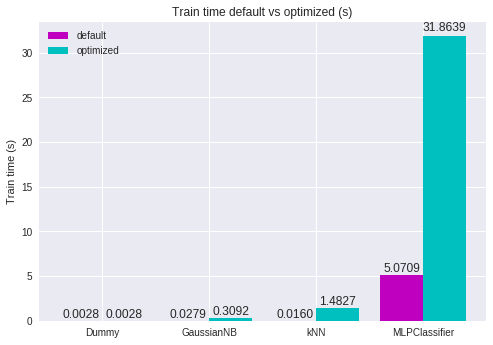

In [ ]:
import matplotlib.pyplot as plt

N = 4
time_default = list(train_time_default.values())

ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, time_default, width, color='m')

time_optimized = time_optimized = list(train_time_optimized.values())

rects2 = ax.bar(ind + width, time_optimized, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Train time (s)')
ax.set_title('Train time default vs optimized (s)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(train_time_default.keys()))

ax.legend((rects1[0], rects2[0]), ('default', 'optimized'))

# Turn on the grid
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                "{:.4f}".format(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

It's clear that MLPClassifier needs the most time in training both when default and optimized. In each classifier the increased time is due to the pipe, beacause we first need to apply the Variance Theshold. In MLPClassifier, the huge increase of fit time, apart from the pipe, is a result of the logistic activation function, the increase of the hidden neuros at the first hidden layer and the dicrease of alpa, which needs more time to converge.

In [ ]:
f1_scores = [f1_micro_default, f1_micro_optimized]
print("F1 micro scores:")
pd.DataFrame(f1_scores, index=['default', 'optimized'])

F1 micro scores:


,Dummy,GaussianNB,MLPClassifier,kNN
default,0.101852,0.882716,0.953704,0.83642
optimized,0.101852,0.882716,0.956790,0.87963


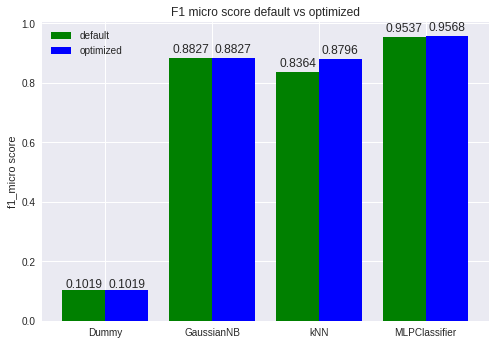

In [ ]:
N = 4
f1_default = list(f1_micro_default.values())

ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, f1_default, width, color='g')

f1_optimized = time_optimized = list(f1_micro_optimized.values())

rects2 = ax.bar(ind + width, f1_optimized, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('f1_micro score')
ax.set_title('F1 micro score default vs optimized')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(f1_micro_default.keys()))

ax.legend((rects1[0], rects2[0]), ('default', 'optimized'))

# Turn on the grid
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                "{:.4f}".format(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
f1_scores = [f1_macro_default, f1_macro_optimized]
print("F1 macro scores:")
pd.DataFrame(f1_scores, index=['default', 'optimized'])

F1 macro scores:


,Dummy,GaussianNB,MLPClassifier,kNN
default,0.102097,0.87578,0.951618,0.819753
optimized,0.102097,0.87578,0.954028,0.875220


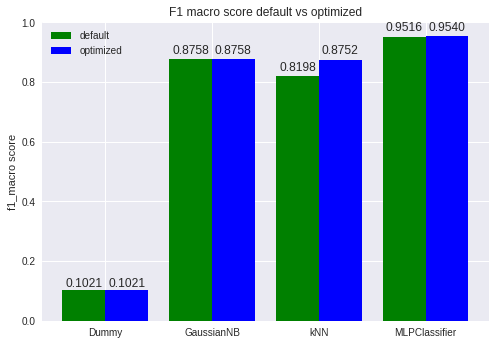

In [ ]:
N = 4
f1_default = list(f1_macro_default.values())

ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, f1_default, width, color='g')

f1_optimized = time_optimized = list(f1_macro_optimized.values())

rects2 = ax.bar(ind + width, f1_optimized, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('f1_macro score')
ax.set_title('F1 macro score default vs optimized')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(f1_macro_default.keys()))

ax.legend((rects1[0], rects2[0]), ('default', 'optimized'))

# Turn on the grid
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                "{:.4f}".format(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Here we can clearly see, that the best classifier for our dataset is MLPClassifier. Althrough, the next better is GaussianNB, there is quite a difference at the results between then. Something important to note, is that no matter how we tried to manipulate our data in order Optimize the GaussianNB, we couldn't achieve a better score than with the initila data. Applying a Variance Theshold (even 0), didn't make any differnce and apllying PCA, even reduced our score, due to significant loss of information.

On the other hand, there was some room for a small optimizations in the MLP Classifier. However, due to the fact that the default solver is adam and that the best solver for our dataset was also Adam, there was only a small increase in our score, by optimizing the rest of the parameters (activation function, hidden_layers_sizes, max_iters and alpha). Of course the optimization of these parameters increased the time needed to fit (as shown in the previous diagram).

Finally, it is important to note, that we always have an average 0.1 error in our f1-scores in each classifier. Having restarted and rerun the whole notebook multiple times, we achieved for the optimized kNN classifier as highest score 0.90  and as lowest score 0.88. We also achieved a highest 0.97 and lowest 0.95 with MLPClassifier. However, whenever we received the lowest score in one classifier, we also received the lowest score at the others classifiers too. And whenever we received the highest score in one classifier we also received the highest scores for the others, too (both defaults and optimized classifiers). Since this behavor is found in the same way in all the classifiers that we tested, it is probably a result of the way the data are splitted into train and test data. 